In [1]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/children_products/!03&04_17_VSE.csv', encoding='cp1251', sep=';')

In [3]:
df.shape

(691539, 38)

In [4]:
stats = pd.DataFrame({
    'Название колонки': df.columns,
    'Количество уникальных': df.nunique(),
    'Количество нулей': (df == 0).sum(),
    'Количество NaN': df.isna().sum(),
    '% NaN': round(df.isna().sum() / len(df) * 100, 1),
    'Тип данных': df.dtypes
}).reset_index(drop=True)

print(tabulate(stats, headers='keys', tablefmt='orgtbl', showindex=False))

| Название колонки         |   Количество уникальных |   Количество нулей |   Количество NaN |   % NaN | Тип данных   |
|--------------------------+-------------------------+--------------------+------------------+---------+--------------|
| Дата                     |                   28887 |                  0 |                0 |     0   | object       |
| ДатаДоставки             |                     107 |                  0 |              626 |     0.1 | object       |
| НомерЗаказаНаСайте       |                  178418 |                  0 |                4 |     0   | object       |
| НовыйСтатус              |                      14 |                  0 |                0 |     0   | object       |
| СуммаЗаказаНаСайте       |                   14316 |                  0 |                0 |     0   | object       |
| СуммаДокумента           |                   14747 |                  0 |                0 |     0   | object       |
| МетодДоставки            |            

In [5]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\nКолонка '{column}' ({len(unique_values)} уникальных значений):")
    if len(unique_values) <= 10:
        print(unique_values)
    else:
        print(list(unique_values[:10]), "... и еще", len(unique_values) - 10, "значений")


Колонка 'Дата' (28887 уникальных значений):
['01.03.2017 11:41', '01.03.2017 12:22', '01.03.2017 12:31', '01.03.2017 3:06', '01.03.2017 11:38', '01.03.2017 12:19', '01.03.2017 11:57', '01.03.2017 9:02', '01.03.2017 12:00', '01.03.2017 10:39'] ... и еще 28877 значений

Колонка 'ДатаДоставки' (108 уникальных значений):
['07.03.2017 0:00', '15.03.2017 0:00', '17.03.2017 0:00', '02.03.2017 0:00', '14.03.2017 0:00', '09.03.2017 0:00', '03.03.2017 0:00', '04.03.2017 0:00', '16.03.2017 0:00', '10.03.2017 0:00'] ... и еще 98 значений

Колонка 'НомерЗаказаНаСайте' (178419 уникальных значений):
['3998972_TR', '3999117_TR', '3999122_TR', '3999363_TR', '3999411_TR', '3999682_TR', '3999687_TR', '3999713_TR', '3999735_TR', '4000052_TR'] ... и еще 178409 значений

Колонка 'НовыйСтатус' (14 уникальных значений):
['Частичный возврат', 'Доставлен', 'К отгрузке', 'Возврат', 'Возврат из ПВЗ', 'Принят в ПВЗ', 'Расформирован ПВЗ', 'В резерве', 'Отменен', 'Скомплектован Регион'] ... и еще 4 значений

Колонк

In [6]:
df_clean = df.copy()

Удаляем ненужные колонки
- `ДатаЗаказаНаСайте` - дублирует дату
- `КоличествоПроданоКлиенту` - дублирует колонку количества
- `СуммаСтроки` - вычисляется через количество и цену
- `СуммаЗаказаНаСайте` - вычисляется
- `СуммаДокумента` - вычисляется
- `ЦенаЗакупки` - не нужно для рекомендации
- `Маржа` - не нужно для рекомендации
- `СуммаЗаказаНаСайте` - вычисляется
- `СуммаУслуг` - не влияет на рекомендацию товара
- `СуммаДоставки` - не влияет на рекомендацию товара
- `НовыйСтатус` - дублирует статус
- `ПричинаОтмены` - не учитываем статус отмены
- `ТипТовара` - подмножество Типа
- `Номенклатура` - избыточно при сохранении ID-SKU
- `ГородМагазина` - избыточно, оставили упрощенную географию
- `МагазинЗаказа` - не вляет на рекомендацию
- `ПВЗ_код` - не влияет на рекомендацию
- `МесяцДатыЗаказа` - вычисляется из даты
- `ГодДатыЗаказа` - вычисляется из даты
- `НомерЗаказаНаСайте` - техническая информация
- `НомерСтроки` - техническая информация
- `ЭлектроннаяПочта_new` - конфиденциальная информация пользователя
- `Клиент` - не определяет однозначно пользователя (возьмем Телефон_new)

In [64]:
df_clean = df_clean.drop(['ДатаЗаказаНаСайте', 'КоличествоПроданоКлиенту', 'СуммаСтроки', 'СуммаЗаказаНаСайте'], axis=1)
df_clean = df_clean.drop(['СуммаДокумента', 'ЦенаЗакупки', 'Маржа'], axis=1)
df_clean = df_clean.drop(['СуммаУслуг', 'СуммаДоставки', 'НовыйСтатус', 'ПричинаОтмены'], axis=1)
df_clean = df_clean.drop(['ТипТовара', 'Номенклатура', 'ГородМагазина', 'МагазинЗаказа'], axis=1)
df_clean = df_clean.drop(['ПВЗ_код', 'МесяцДатыЗаказа', 'ГодДатыЗаказа', 'НомерЗаказаНаСайте'], axis=1)
df_clean = df_clean.drop(['НомерСтроки', 'Клиент', 'ЭлектроннаяПочта_new'], axis=1)

In [65]:
stats = pd.DataFrame({
    'Название колонки': df_clean.columns,
    'Количество уникальных': df_clean.nunique(),
    'Количество нулей': (df_clean == 0).sum(),
    'Количество NaN': df_clean.isna().sum(),
    '% NaN': round(df_clean.isna().sum() / len(df_clean) * 100, 1),
    'Тип данных': df_clean.dtypes
}).reset_index(drop=True)

print(tabulate(stats, headers='keys', tablefmt='orgtbl', showindex=False))

| Название колонки   |   Количество уникальных |   Количество нулей |   Количество NaN |   % NaN | Тип данных   |
|--------------------+-------------------------+--------------------+------------------+---------+--------------|
| Дата               |                   28887 |                  0 |                0 |     0   | object       |
| ДатаДоставки       |                     107 |                  0 |              626 |     0.1 | object       |
| МетодДоставки      |                       7 |                  0 |                0 |     0   | object       |
| ФормаОплаты        |                       2 |                  0 |                0 |     0   | object       |
| Регион             |                     508 |                  0 |             5142 |     0.7 | object       |
| Группа2            |                      13 |                  0 |            74686 |    10.8 | object       |
| Группа3            |                      93 |                  0 |            74686 |

In [66]:
for column in df_clean.columns:
    unique_values = df_clean[column].unique()
    print(f"\nКолонка '{column}' ({len(unique_values)} уникальных значений):")
    if len(unique_values) <= 10:
        print(unique_values)
    else:
        print(list(unique_values[:10]), "... и еще", len(unique_values) - 10, "значений")


Колонка 'Дата' (28887 уникальных значений):
['01.03.2017 11:41', '01.03.2017 12:22', '01.03.2017 12:31', '01.03.2017 3:06', '01.03.2017 11:38', '01.03.2017 12:19', '01.03.2017 11:57', '01.03.2017 9:02', '01.03.2017 12:00', '01.03.2017 10:39'] ... и еще 28877 значений

Колонка 'ДатаДоставки' (108 уникальных значений):
['07.03.2017 0:00', '15.03.2017 0:00', '17.03.2017 0:00', '02.03.2017 0:00', '14.03.2017 0:00', '09.03.2017 0:00', '03.03.2017 0:00', '04.03.2017 0:00', '16.03.2017 0:00', '10.03.2017 0:00'] ... и еще 98 значений

Колонка 'МетодДоставки' (7 уникальных значений):
['Курьерская' 'Магазины' 'Pick point' 'DPD' 'Транспортная компания'
 'Самовывоз' 'Почта России']

Колонка 'ФормаОплаты' (2 уникальных значений):
['Наличная' 'Безналичная']

Колонка 'Регион' (509 уникальных значений):
['Москва', 'Челябинск', 'Нижневартовск', 'Ижевск', 'Подольск (Московская область район)', 'Красногорск (Красногорский район)', 'Красково (Люберецкий район)', 'Клин (Клинский район)', 'Саратов', 'Волжс

Займемся преобразованием данных для того, чтобы сделать промежуточную таблицу для сегментации через кластеризацию и рекомендаций

Оставим только доставленные заказы

In [67]:
df_clean = df_clean[df_clean['Статус'] == 'Доставлен']
df_clean = df_clean[df_clean['Отменено'] == 'Нет']
print("Итого осталось:", len(df_clean), "заказов")

Итого осталось: 473649 заказов


In [68]:
df_clean['Дата'] = pd.to_datetime(df_clean['Дата'], format='%d.%m.%Y %H:%M')
df_clean['ДатаДоставки'] = pd.to_datetime(df_clean['Дата'], format='%d.%m.%Y %H:%M')

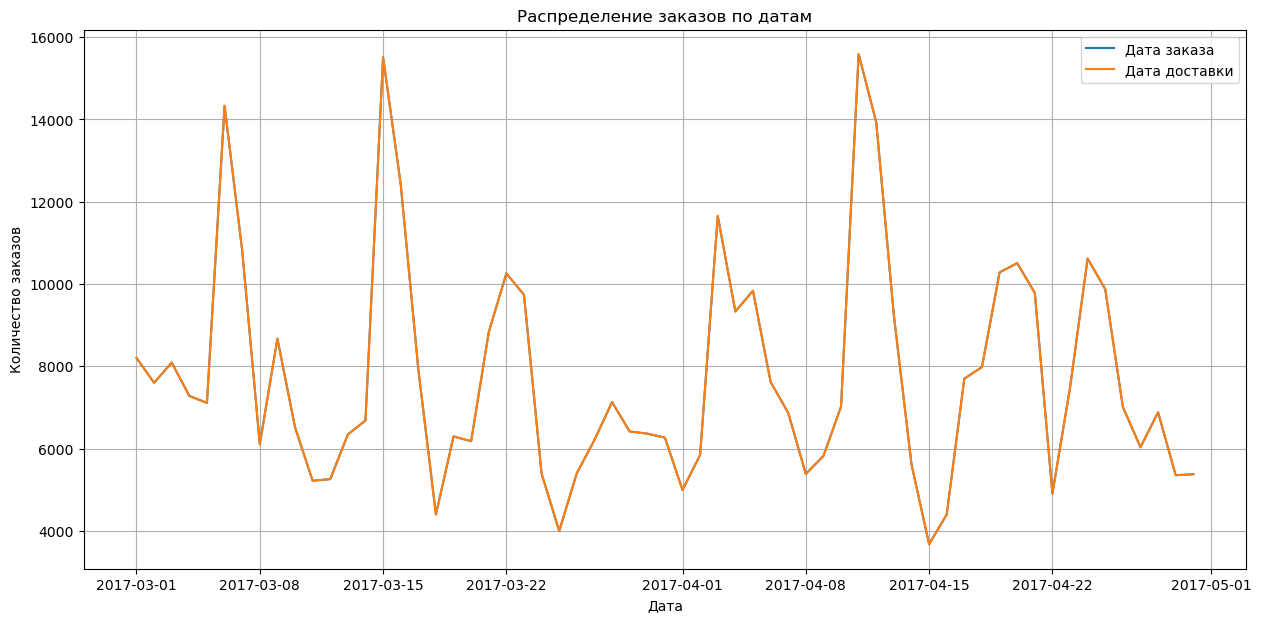

In [69]:
plt.figure(figsize=(15, 7))

orders_by_date = df_clean['Дата'].dt.date.value_counts().sort_index()
plt.plot(orders_by_date.index, orders_by_date.values, label='Дата заказа')

delivery_by_date = df_clean['ДатаДоставки'].dt.date.value_counts().sort_index()
plt.plot(delivery_by_date.index, delivery_by_date.values, label='Дата доставки')

plt.title('Распределение заказов по датам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.legend()
plt.grid(True)
plt.show()

Имеет смысл оставить только события "Доставлен"

In [70]:
df_clean['Цена'] = df_clean['Цена'].astype(str).str.replace(' ', '').str.replace(',', '.')
df_clean['Цена'] = pd.to_numeric(df_clean['Цена'])

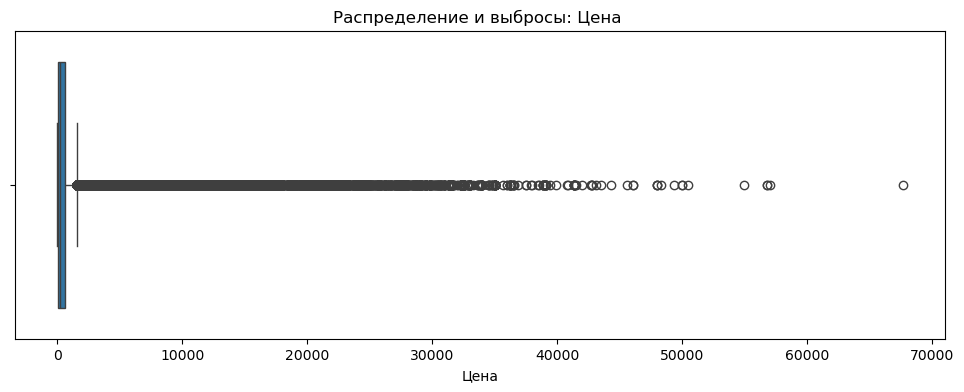

In [71]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_clean['Цена'])
plt.title(f'Распределение и выбросы: Цена ')
plt.xlabel('Цена')
plt.show()

In [ ]:
stats = pd.DataFrame({
    'Название колонки': df_clean.columns,
    'Количество уникальных': df_clean.nunique(),
    'Количество нулей': (df_clean == 0).sum(),
    'Количество NaN': df_clean.isna().sum(),
    '% NaN': round(df_clean.isna().sum() / len(df_clean) * 100, 1),
    'Тип данных': df_clean.dtypes
}).reset_index(drop=True)

print(tabulate(stats, headers='keys', tablefmt='orgtbl', showindex=False))

| Название колонки   |   Количество уникальных |   Количество нулей |   Количество NaN |   % NaN | Тип данных     |
|--------------------+-------------------------+--------------------+------------------+---------+----------------|
| Дата               |                   24021 |                  0 |                0 |     0   | datetime64[ns] |
| ДатаДоставки       |                   24021 |                  0 |                0 |     0   | datetime64[ns] |
| МетодДоставки      |                       6 |                  0 |                0 |     0   | object         |
| ФормаОплаты        |                       2 |                  0 |                0 |     0   | object         |
| Регион             |                     449 |                  0 |             2940 |     0.6 | object         |
| Группа2            |                      13 |                  0 |            51240 |    10.8 | object         |
| Группа3            |                      92 |                  0 |   

In [73]:
df_clean = df_clean[df_clean['Цена'] != 0]
print(df_clean.shape)

(473627, 16)


In [74]:
category_cols = ['Группа2', 'Группа3', 'Группа4']
for col in category_cols:
    df_clean[col] = df_clean[col].fillna('Unknown')

region_nan_before = df['Регион'].isna().sum()
df_clean = df_clean[df_clean['Регион'].notna()]

In [75]:
stats = pd.DataFrame({
    'Название колонки': df_clean.columns,
    'Количество уникальных': df_clean.nunique(),
    'Количество нулей': (df_clean == 0).sum(),
    'Количество NaN': df_clean.isna().sum(),
    '% NaN': round(df_clean.isna().sum() / len(df_clean) * 100, 1),
    'Тип данных': df_clean.dtypes
}).reset_index(drop=True)

print(tabulate(stats, headers='keys', tablefmt='orgtbl', showindex=False))

| Название колонки   |   Количество уникальных |   Количество нулей |   Количество NaN |   % NaN | Тип данных     |
|--------------------+-------------------------+--------------------+------------------+---------+----------------|
| Дата               |                   23125 |                  0 |                0 |       0 | datetime64[ns] |
| ДатаДоставки       |                   23125 |                  0 |                0 |       0 | datetime64[ns] |
| МетодДоставки      |                       6 |                  0 |                0 |       0 | object         |
| ФормаОплаты        |                       2 |                  0 |                0 |       0 | object         |
| Регион             |                     449 |                  0 |                0 |       0 | object         |
| Группа2            |                      14 |                  0 |                0 |       0 | object         |
| Группа3            |                      93 |                  0 |   

In [76]:
df_clean.to_csv('../data/children_products_cleaned.csv', index=False, encoding='utf-8')